In [63]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
messy_data=pd.read_table("pew.csv",sep=',')
pew_data=pd.melt(messy_data,id_vars=['religion'],var_name='income',value_name='frequency')
pew_data

,religion,income,frequency
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovah's Witness,<$10k,20
9,Jewish,<$10k,19


In [4]:
tb_data=pd.read_csv("tb.csv")
tb_data_filtered=pd.melt(tb_data,id_vars=['iso2','year'],value_name='cases',var_name='sex_age')
parts=tb_data_filtered["sex_age"].str.extract("(\D)(\d*)(\d{2})",expand=True)
parts.colums=['gender','lowerAge','upperAge']
parts['age']=parts[1] + '-' + parts[2]
print(parts.dropna().head())
parts['gender']=parts[0]
parts.drop([0,1,2],axis=1)
tb_data_filtered=pd.concat([tb_data_filtered,parts],axis=1)
tb_data_filtered.age.replace(["-04", "-65"], ["0-4", "65+"], inplace = True)
tb_data_filtered=tb_data_filtered.drop([0,1,2,'sex_age'],axis=1)
tb_data_filtered=tb_data_filtered.dropna()
tb_data_filtered=tb_data_filtered.sort_values(by=['iso2','year','gender','age','cases'])
tb_data_filtered=tb_data_filtered.reset_index()
tb_data_filtered=tb_data_filtered.drop('index',axis=1)
tb_data_filtered

   0 1   2  age
0  m    04  -04
1  m    04  -04
2  m    04  -04
3  m    04  -04
4  m    04  -04


,iso2,year,cases,age,gender
0,AD,1996,0.0,0-14,f
1,AD,1996,1.0,15-24,f
2,AD,1996,1.0,25-34,f
3,AD,1996,0.0,35-44,f
4,AD,1996,0.0,45-54,f
5,AD,1996,1.0,55-64,f
6,AD,1996,0.0,65+,f
7,AD,1996,0.0,0-14,m
8,AD,1996,0.0,15-24,m
9,AD,1996,0.0,25-34,m


In [5]:
weather = pd.read_csv("weather.csv")
weather=pd.melt(weather,id_vars=['id','year','month','element'],var_name='day')
weather['day']=weather['day'].str.extract("(\d+)",expand= True).astype(np.int64)
weather=weather.dropna()
weather['date']=pd.to_datetime(weather[['year','month','day']])
weather=weather.drop(['year','month','day'],axis=1)
weather=weather.pivot_table(index=['id','date'],columns='element',values='value')
weather.reset_index(inplace=True)
weather

element,id,date,tmax,tmin
0,MX17004,2010-01-30,27.8,14.5
1,MX17004,2010-02-02,27.3,14.4
2,MX17004,2010-02-03,24.1,14.4
3,MX17004,2010-02-11,29.7,13.4
4,MX17004,2010-02-23,29.9,10.7
5,MX17004,2010-03-05,32.1,14.2
6,MX17004,2010-03-10,34.5,16.8
7,MX17004,2010-03-16,31.1,17.6
8,MX17004,2010-04-27,36.3,16.7
9,MX17004,2010-05-27,33.2,18.2


In [6]:
bd=pd.read_csv('billboard.csv')
bd['Date']=pd.to_datetime(bd['date.entered'])
bd=bd.drop('date.entered', axis=1)
bd=pd.melt(bd,['year','artist','track','time','Date'])
bd["numberWeeks"]=bd['variable'].str.extract("(\d+)", expand=True).astype(np.int64)
bd['numberWeeks']*=7
bd["numberWeeks"]=pd.to_timedelta(bd["numberWeeks"],unit='day')
bd["Date"]=bd["Date"]+bd["numberWeeks"]
bd['rank']=bd['value']
bd=bd.dropna()
bd=bd.reset_index()
bd=bd.drop(['variable','numberWeeks','value','index'],axis=1)
bd['id']=range(1,len(bd)+1)
ranks=pd.DataFrame(index=[bd['id'],bd['Date'],bd['rank']])
song_info=bd
song_info.drop(['Date','rank'],axis=1)
ranks

,,
id,Date,rank
1,2000-03-04,87.0
2,2000-09-09,91.0
3,2000-04-15,81.0
4,2000-10-28,76.0
5,2000-04-22,57.0
6,2000-08-26,51.0
7,2000-07-15,97.0
8,2000-02-05,84.0
9,2000-03-25,59.0


In [10]:
accidents=pd.read_csv("Kaagle_Upload.csv", low_memory=False)
variables = pd.read_excel("Road-Accident-Safety-Data-Guide (1).xls",
sheetname = None)
vehicle_types = variables["Vehicle Type"].set_index("code")
vehicle_types = vehicle_types.rename(columns = {"label": "vehicle_type"})
vehicle_type_map = vehicle_types.to_dict()
accidents = accidents.replace(vehicle_type_map)
vehicle_manoeuvre=variables["Vehicle Manoeuvre"].set_index('code')
vehicle_manoeuvre=vehicle_manoeuvre.rename(columns={'label':'vehicle_manoeuvre'})
vehicle_manoeuvre_map=vehicle_manoeuvre.to_dict()
accidents=accidents.replace(vehicle_manoeuvre_map)
junction_location=variables["Junction Location"].set_index("code")
junction_location=junction_location.rename(columns={"label":"junction_location"})
junction_location_map=junction_location.to_dict()
accidents=accidents.replace(junction_location_map)                                                 
accidents.head()


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,Car,0,Going ahead other,0,Mid Junction - on roundabout or on main road,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,Car,0,Turning right,0,Mid Junction - on roundabout or on main road,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,Car,0,Going ahead other,0,Mid Junction - on roundabout or on main road,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,Goods over 3.5t. and under 7.5t,0,Slowing or stopping,0,Not at or within 20 metres of junction,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,Car,0,Overtaking - nearside,0,Approaching junction or waiting/parked at junc...,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
weather = pd.read_csv("https://raw.githubusercontent.com/apawlik/2014-04-09-GARNET/gh-pages/lessons/garnet/pandas/data/weather_year.csv")
weather.columns=['EDT', 'Max_TemperatureF', 'Mean_TemperatureF', 'Min_TemperatureF',
       'Max_Dew_PointF', 'MeanDew_PointF', 'Min_DewpointF', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressureIn',
       'Mean_Sea_Level_PressureIn', 'Min_Sea_Level_PressureIn',
       'Max_VisibilityMiles', 'Mean_VisibilityMiles', 'Min_VisibilityMiles',
       'Max_Wind_SpeedMPH', 'Mean_Wind_SpeedMPH', 'Max_Gust_SpeedMPH',
       'PrecipitationIn', 'CloudCover', 'Events', 'WindDirDegrees']
weather["EDT"]=pd.to_datetime(weather["EDT"])
weather.PrecipitationIn=weather.PrecipitationIn.replace("T",value=1e-10).astype(np.float64)
weather.Events=weather.Events.fillna(value="")
weather.index=weather.EDT
weather=weather.drop('EDT',axis=1)
weather.Max_Gust_SpeedMPH=weather.Max_Gust_SpeedMPH.fillna(0)
weather.describe().T

,count,mean,std,min,25%,50%,75%,max
Max_TemperatureF,366.0,66.803279,20.361247,16.00,51.00,69.00,84.0000,106.00
Mean_TemperatureF,366.0,55.683060,18.436506,11.00,41.00,59.00,70.7500,89.00
Min_TemperatureF,366.0,44.101093,17.301141,1.00,30.00,47.00,57.7500,77.00
Max_Dew_PointF,366.0,49.549180,16.397178,0.00,36.00,54.50,62.0000,77.00
MeanDew_PointF,366.0,44.057377,16.829996,-3.00,30.00,48.00,57.0000,72.00
Min_DewpointF,366.0,37.980874,17.479449,-5.00,24.00,41.00,51.0000,71.00
Max_Humidity,366.0,90.027322,9.108438,54.00,85.00,93.00,96.0000,100.00
Mean_Humidity,366.0,67.860656,9.945591,37.00,61.25,68.00,74.0000,95.00
Min_Humidity,366.0,45.193989,15.360261,15.00,35.00,42.00,54.0000,90.00
Max_Sea_Level_PressureIn,366.0,30.108907,0.172189,29.64,29.99,30.10,30.2100,30.60


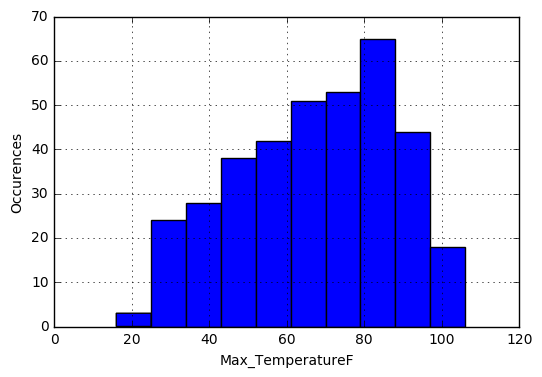

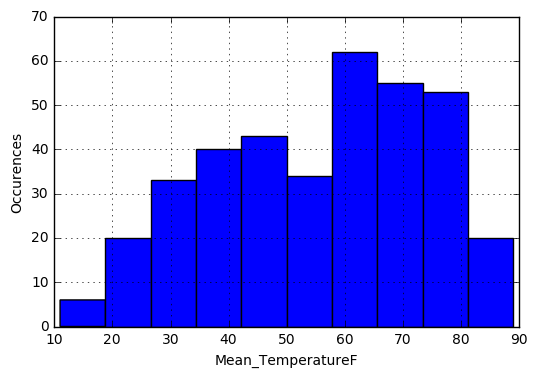

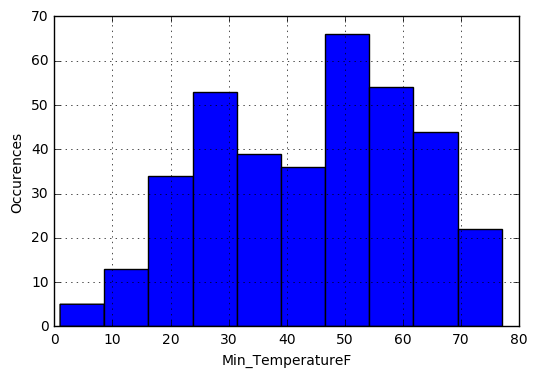

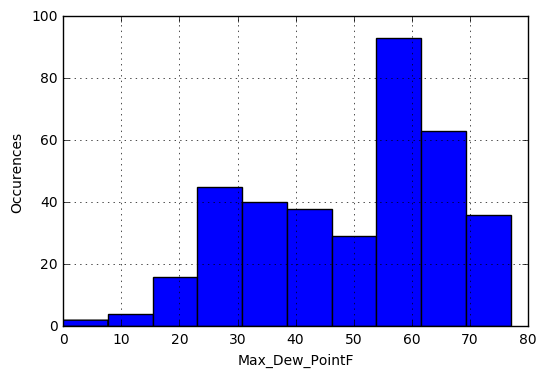

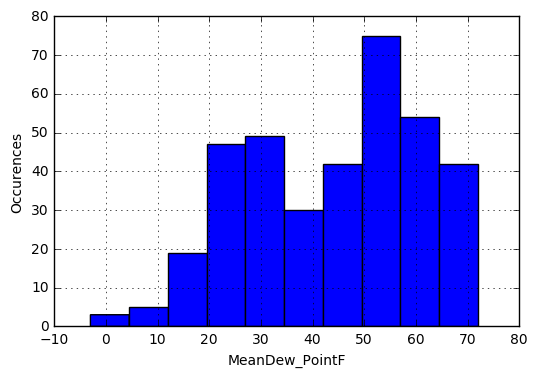

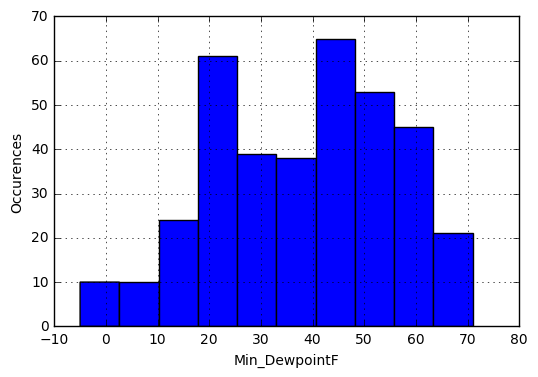

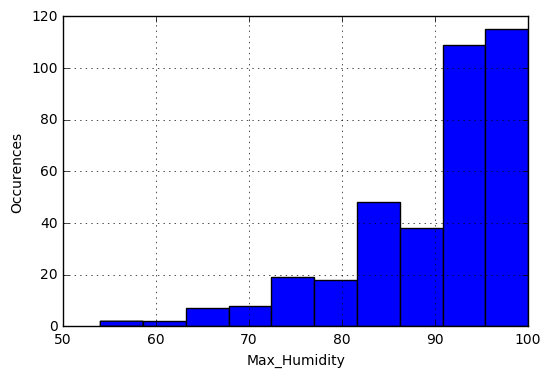

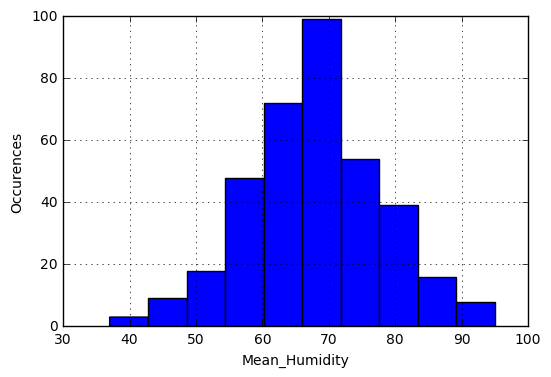

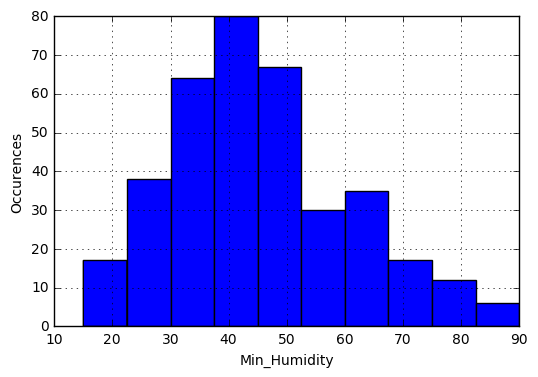

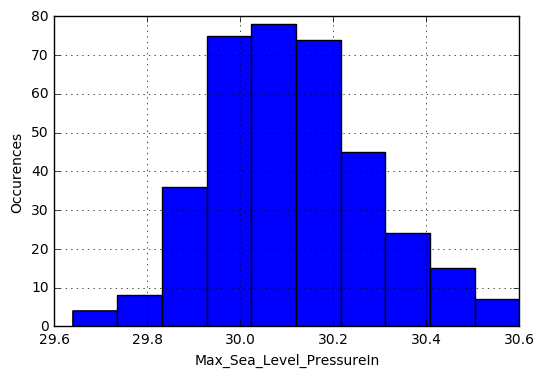

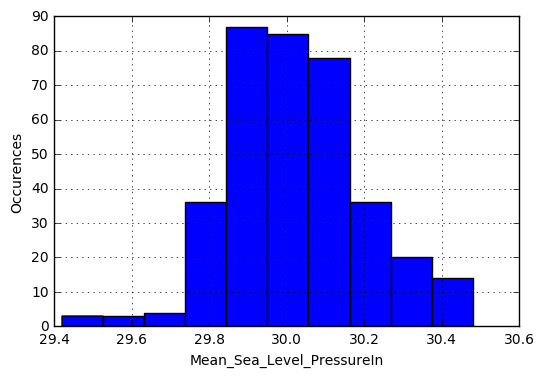

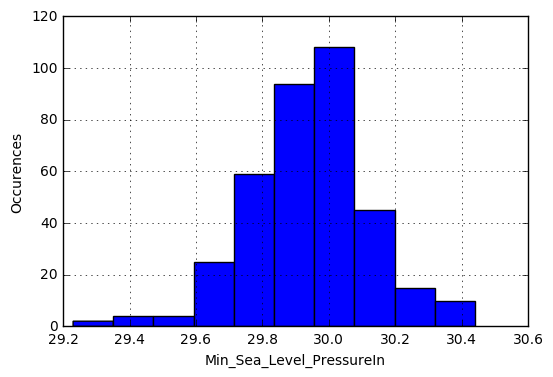

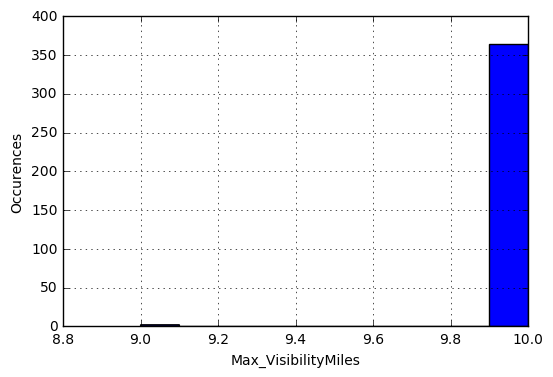

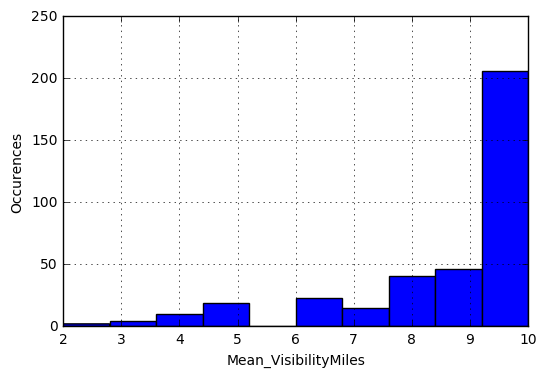

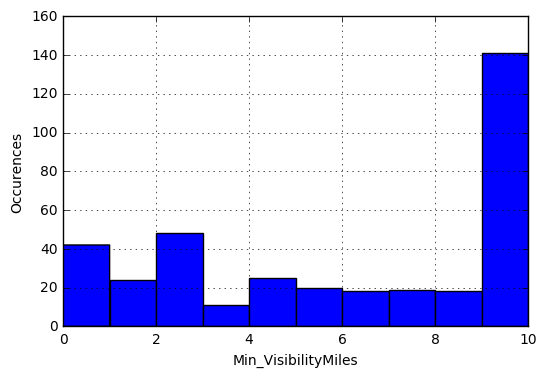

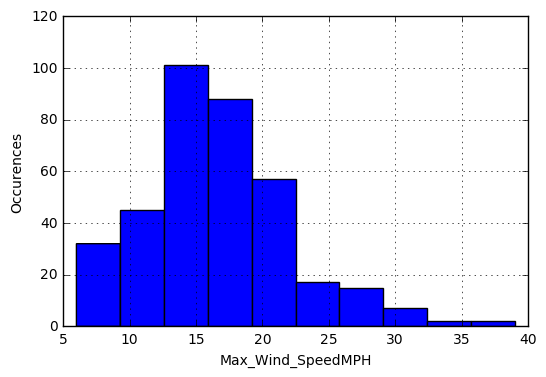

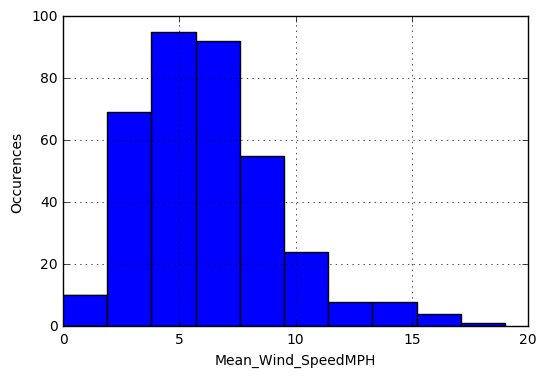

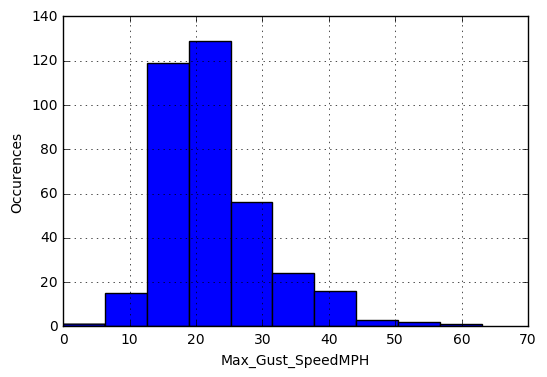

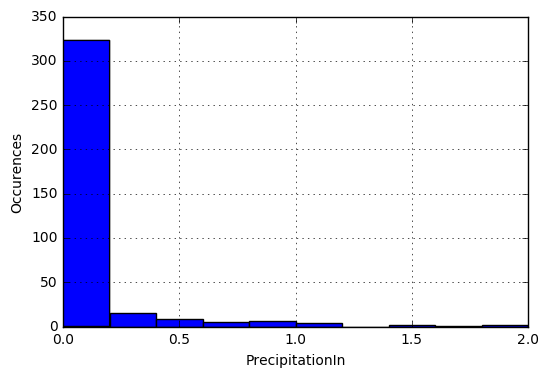

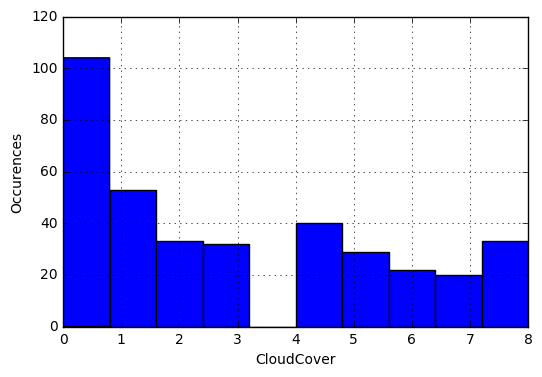

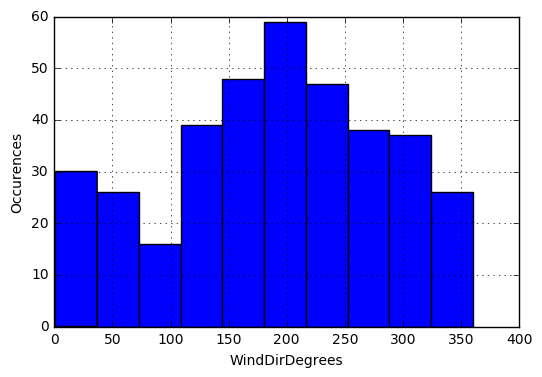

In [66]:
for col in weather.columns:
    if weather[str(col)].dtype!= object:
        weather[str(col)].hist()
        plt.xlabel(col)
        plt.ylabel("Occurences")
        plt.show()

In [101]:
#1. mpg:           continuous
 #  2. cylinders:     multi-valued discrete
  # 3. displacement:  continuous
   #4. horsepower:    continuous
   #5. weight:        continuous
  # 6. acceleration:  continuous
  # 7. model year:    multi-valued discrete
  # 8. origin:        multi-valued discrete
  # 9. car name:      string (unique for each instance)
cars= pd.read_fwf("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",header=None)
cars.columns=['mpg',' cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
parts=cars.car_name.str.extract("([a-zA-Z]+) (.+)\"",expand=True)
cars["model"]=parts[0]
cars['model_type']=parts[1]
cars=cars.drop('car_name',axis=1)
cars['temp_horsepower']=cars.horsepower.str.extract("(\d+)",expand=True).astype(np.float64)
mean_value=cars['temp_horsepower'].dropna().mean()
cars.horsepower=cars.horsepower.replace('?',mean_value).astype(np.float64)
cars=cars.drop('temp_horsepower',axis=1)
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,model,model_type
0,18.0,8,307.0,130.000000,3504.0,12.0,70,1,chevrolet,chevelle malibu
1,15.0,8,350.0,165.000000,3693.0,11.5,70,1,buick,skylark 320
2,18.0,8,318.0,150.000000,3436.0,11.0,70,1,plymouth,satellite
3,16.0,8,304.0,150.000000,3433.0,12.0,70,1,amc,rebel sst
4,17.0,8,302.0,140.000000,3449.0,10.5,70,1,ford,torino
5,15.0,8,429.0,198.000000,4341.0,10.0,70,1,ford,galaxie 500
6,14.0,8,454.0,220.000000,4354.0,9.0,70,1,chevrolet,impala
7,14.0,8,440.0,215.000000,4312.0,8.5,70,1,plymouth,fury iii
8,14.0,8,455.0,225.000000,4425.0,10.0,70,1,pontiac,catalina
9,15.0,8,390.0,190.000000,3850.0,8.5,70,1,amc,ambassador dpl
